In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
# importing ploting libraries
import matplotlib.pyplot as plt 

In [5]:
from scipy.stats import zscore

In [6]:
import seaborn as sns

In [7]:
# reading the CSV file into pandas dataframe
wine_data = pd.read_csv("D:\\Ml_Data\\winequality-red.csv") 

In [8]:
wine_data_attr = wine_data.iloc[:,0:12]
print(wine_data_attr.shape)
wine_data_attr.head()

(1599, 12)


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [9]:
features = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide', 'density','pH', 'sulphates','alcohol','quality']


C:\Users\Mukesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Mukesh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Mukesh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


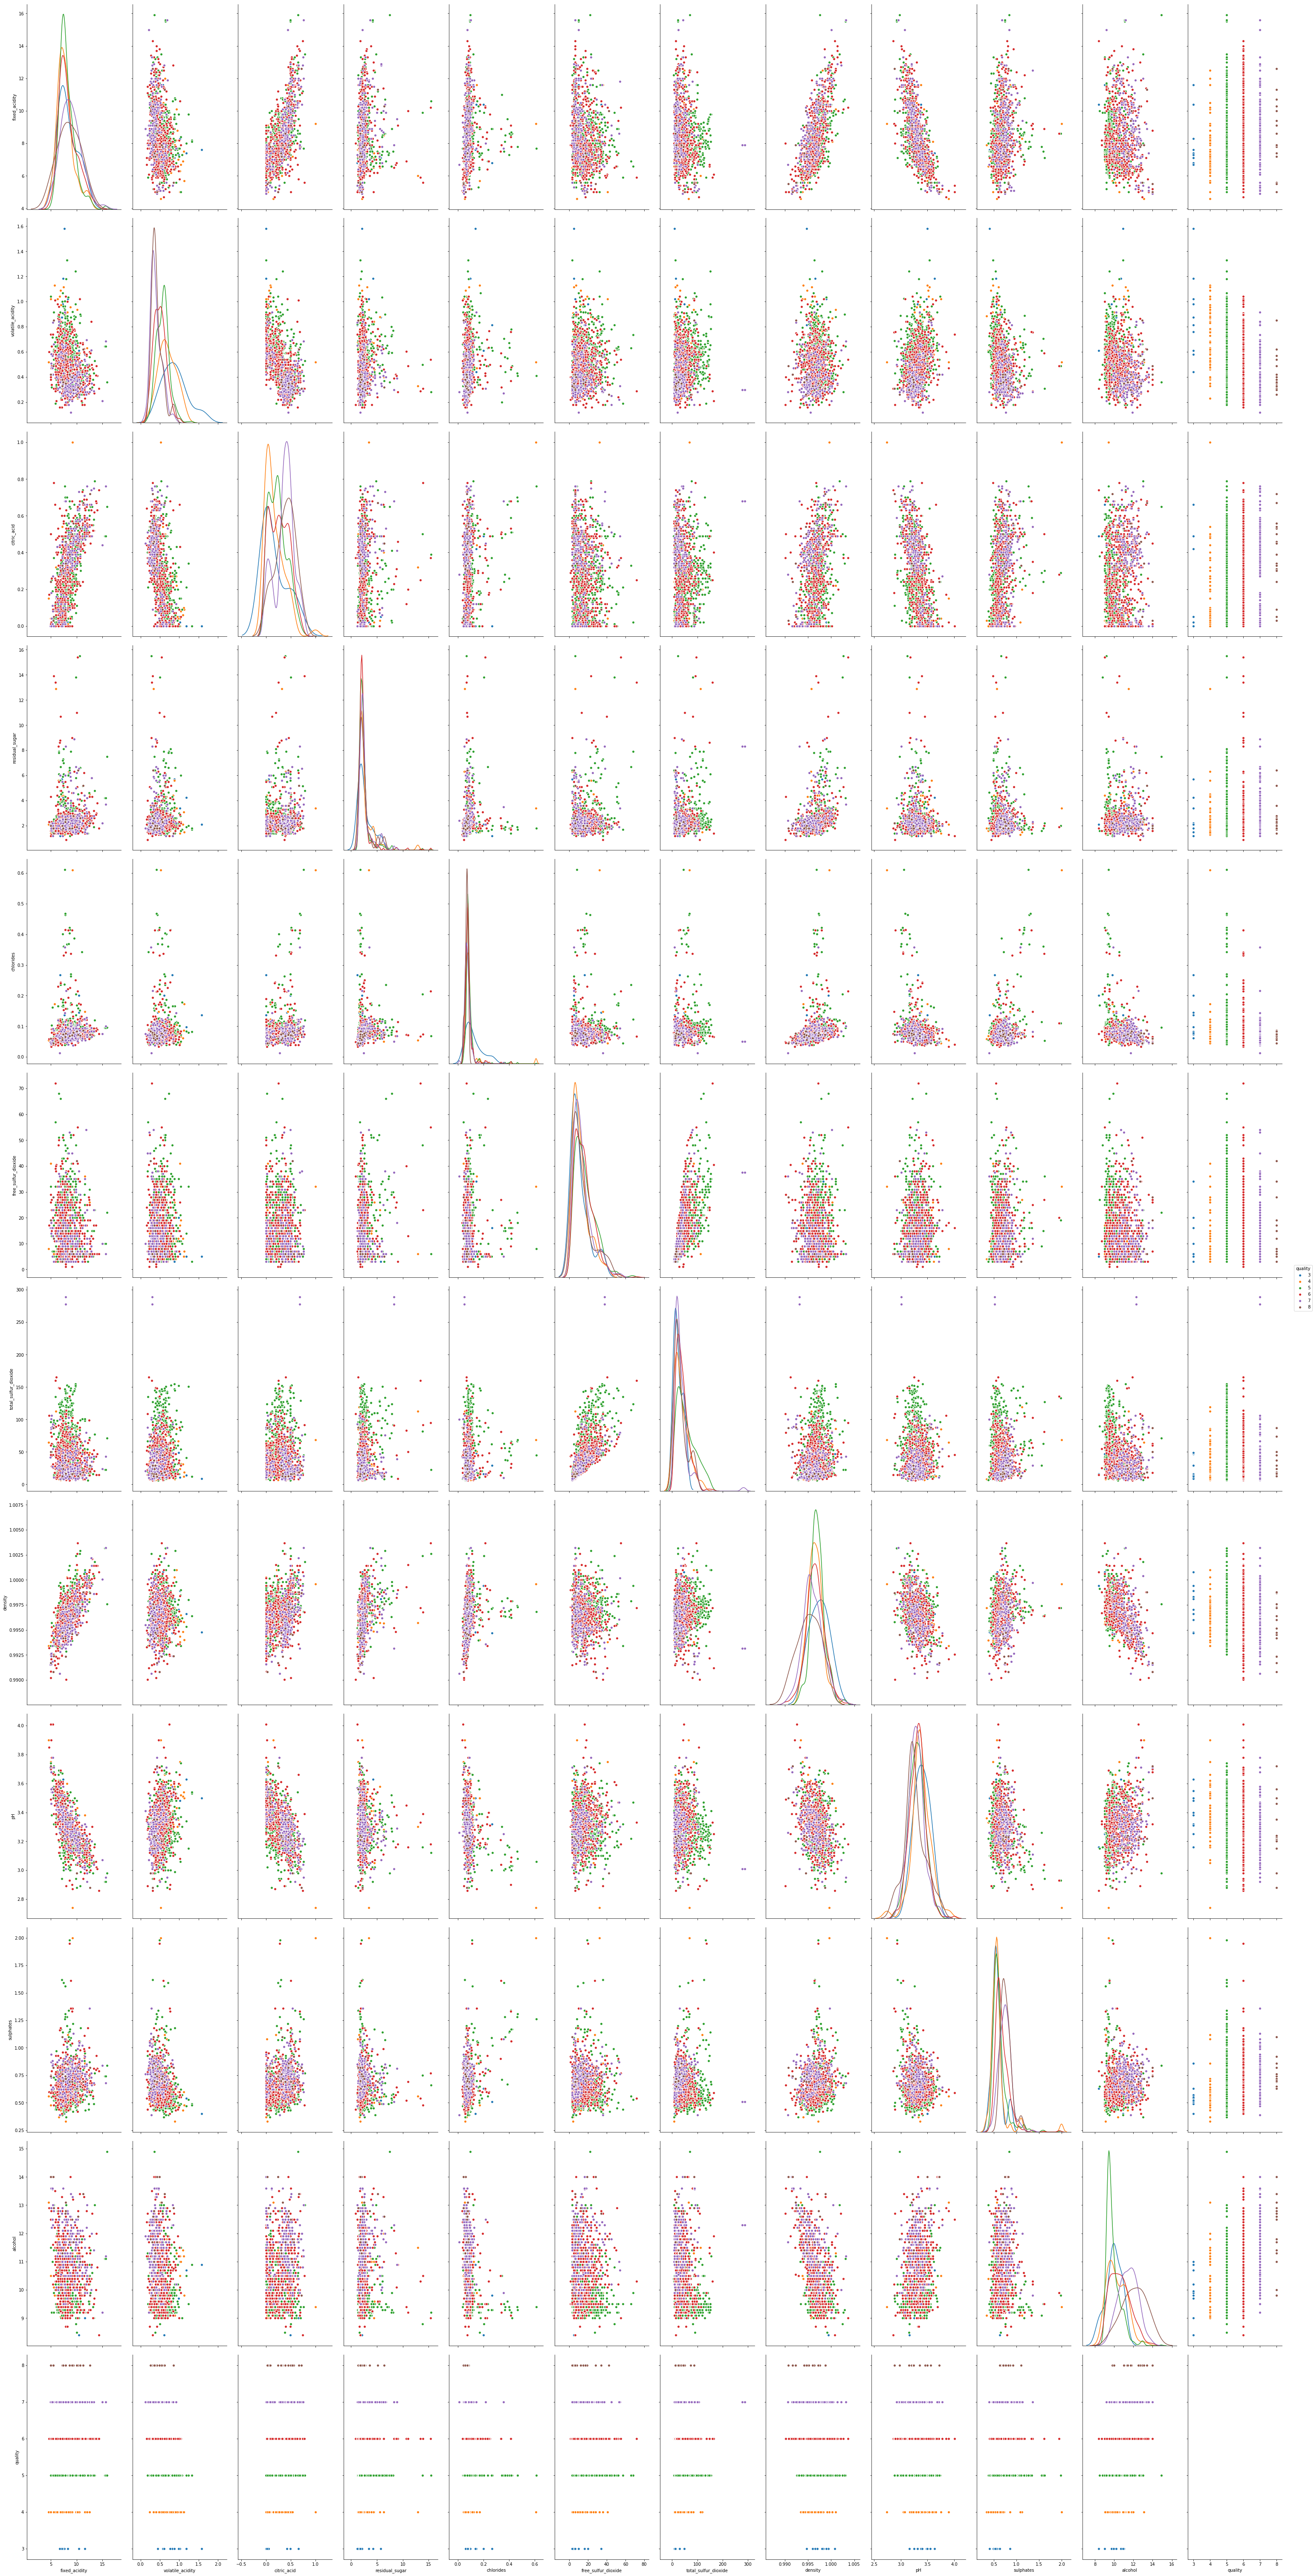

In [10]:
#importing seaborn for statistical plots
import seaborn as sns


sns.pairplot(wine_data, size=7,aspect=0.5 , diag_kind='kde' , hue='quality')

In [10]:
from sklearn.cluster import AgglomerativeClustering 

In [19]:
#model = AgglomerativeClustering(n_clusters=7, affinity='euclidean',  linkage='average')

# Rename this to HC_Avg to prevent any confusion ... we are not building any model here...

hc_avg = AgglomerativeClustering(n_clusters=7, affinity='euclidean',  linkage='average')

In [20]:
#model.fit(wine_data_attr)

hc_avg.fit(wine_data_attr)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=7,
                        pooling_func='deprecated')

In [21]:
# wine_data_attr['labels'] = model.labels_   # returns the cluster id to which each record in the DF belong

wine_data_attr['labels'] = hc_avg.labels_ 

wine_data_attr.groupby(["labels"]).count()   # observe that some clusters are too small - mostly outliers 

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
labels                                                                 
0                   2                 2            2               2   
1                 185               185          185             185   
2                 589               589          589             589   
3                   2                 2            2               2   
4                   7                 7            7               7   
5                 756               756          756             756   
6                  58                58           58              58   

        chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density   pH  \
labels                                                                       
0               2                    2                     2        2    2   
1             185                  185                   185      185  185   
2             589                  589                   589      589  589   
3               2                    2                     2        2    2   
4               7                    7                     7        7    7   
5             756                  756                   756      756  756   
6              58                   58                    58       58   58   

        sulphates  alcohol  quality  
labels                               
0               2        2        2  
1             185      185      185  
2             589      589      589  
3               2        2        2  
4               7        7        7  
5             756      756      756  
6              58       58       58

In [61]:
wine_clusters = wine_data_attr.groupby(['labels'])   # This creates dataframegroupby object... not a dataframe

In [62]:
wine_groups=wine_clusters.head(1599)#This creates a pandas dataframegroupby object

wine_groups.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
labels                  1599 non-null int64
dtypes: float64(11), int64(2)
memory usage: 174.9 KB


In [48]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [49]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points using default Euclidian methods

In [50]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering


Z = linkage(wine_groups, 'average')   # creates the grid of avg linkag basesd distance between points

c, coph_dists = cophenet(Z , pdist(wine_groups))

c

0.8336491365939633

In [26]:
print(Z.shape)

Z[1]
Z[1:10]

(1598, 4)


array([[ 787.,  788.,    0.,    2.],
       [ 318.,  320.,    0.,    2.],
       [ 135.,  140.,    0.,    2.],
       [ 422.,  424.,    0.,    2.],
       [ 434.,  438.,    0.,    2.],
       [1352., 1353.,    0.,    2.],
       [ 118.,  121.,    0.,    2.],
       [1229., 1232.,    0.,    2.],
       [ 641.,  643.,    0.,    2.]])

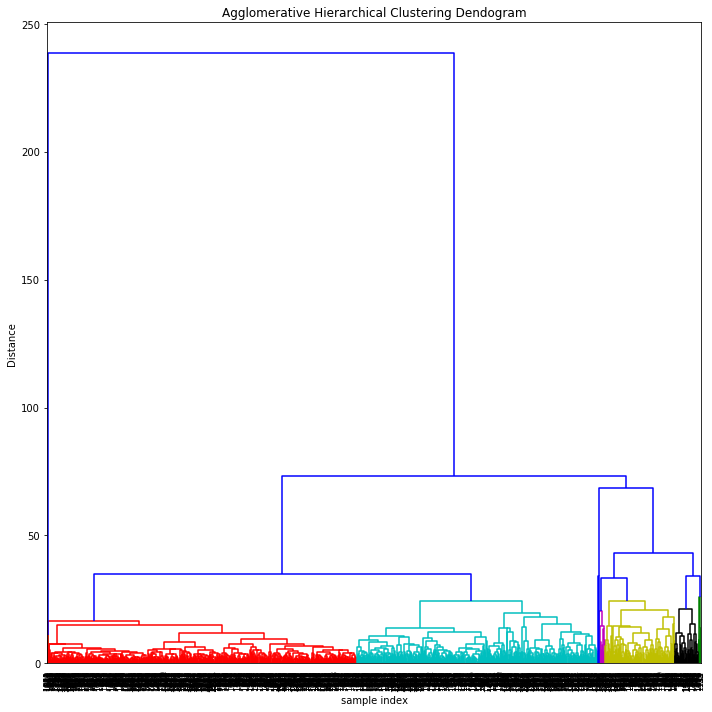

In [51]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

In [52]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering



Z = linkage(wine_groups, 'complete')
c, coph_dists = cophenet(Z , pdist(wine_groups))

c

0.7382856463892421

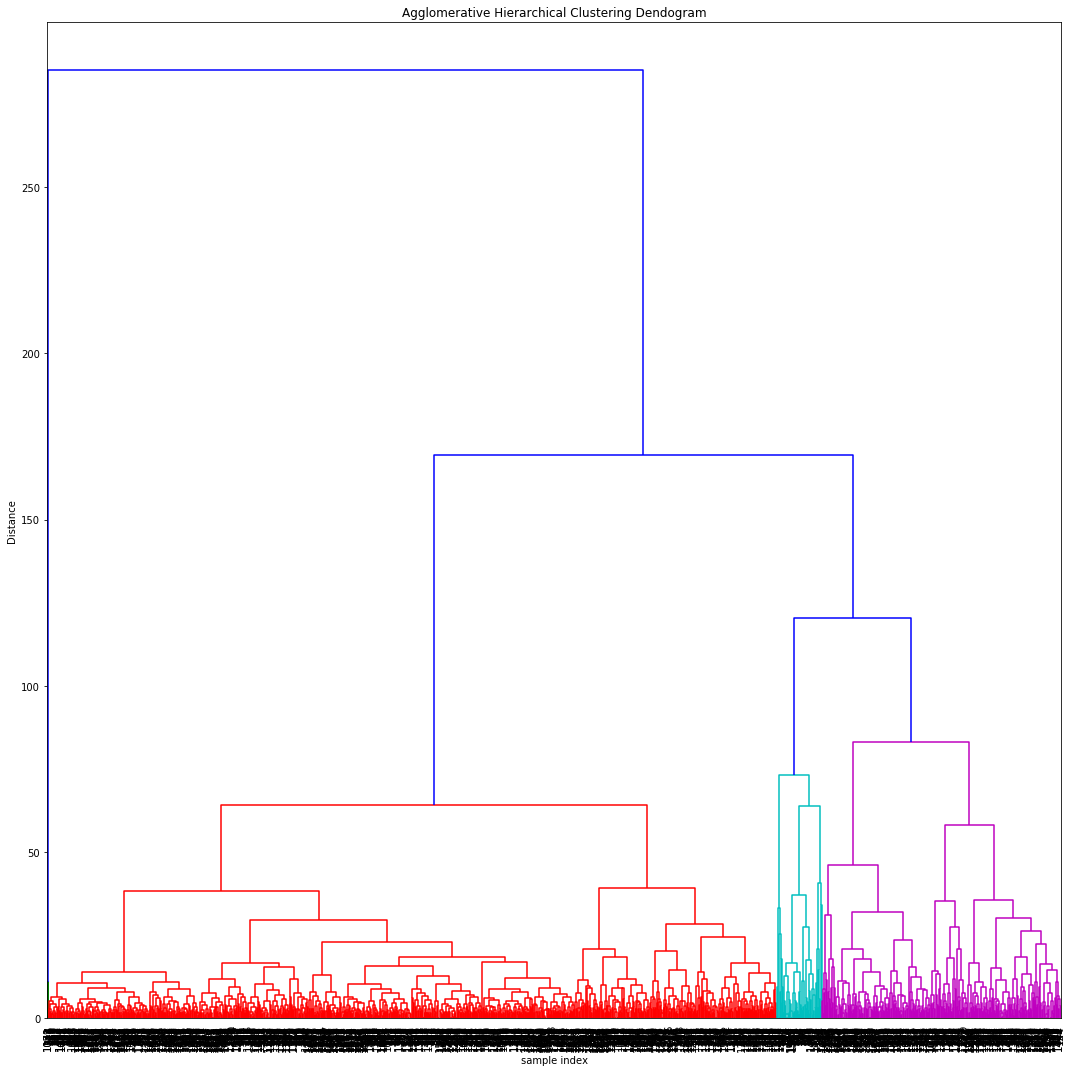

In [53]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [54]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

#Z = linkage(wine_data_attr, 'ward')
#c, coph_dists = cophenet(Z , pdist(wine_data_attr))

Z = linkage(wine_groups, 'ward')
c, coph_dists = cophenet(Z , pdist(wine_groups))

c

0.6688602424270201

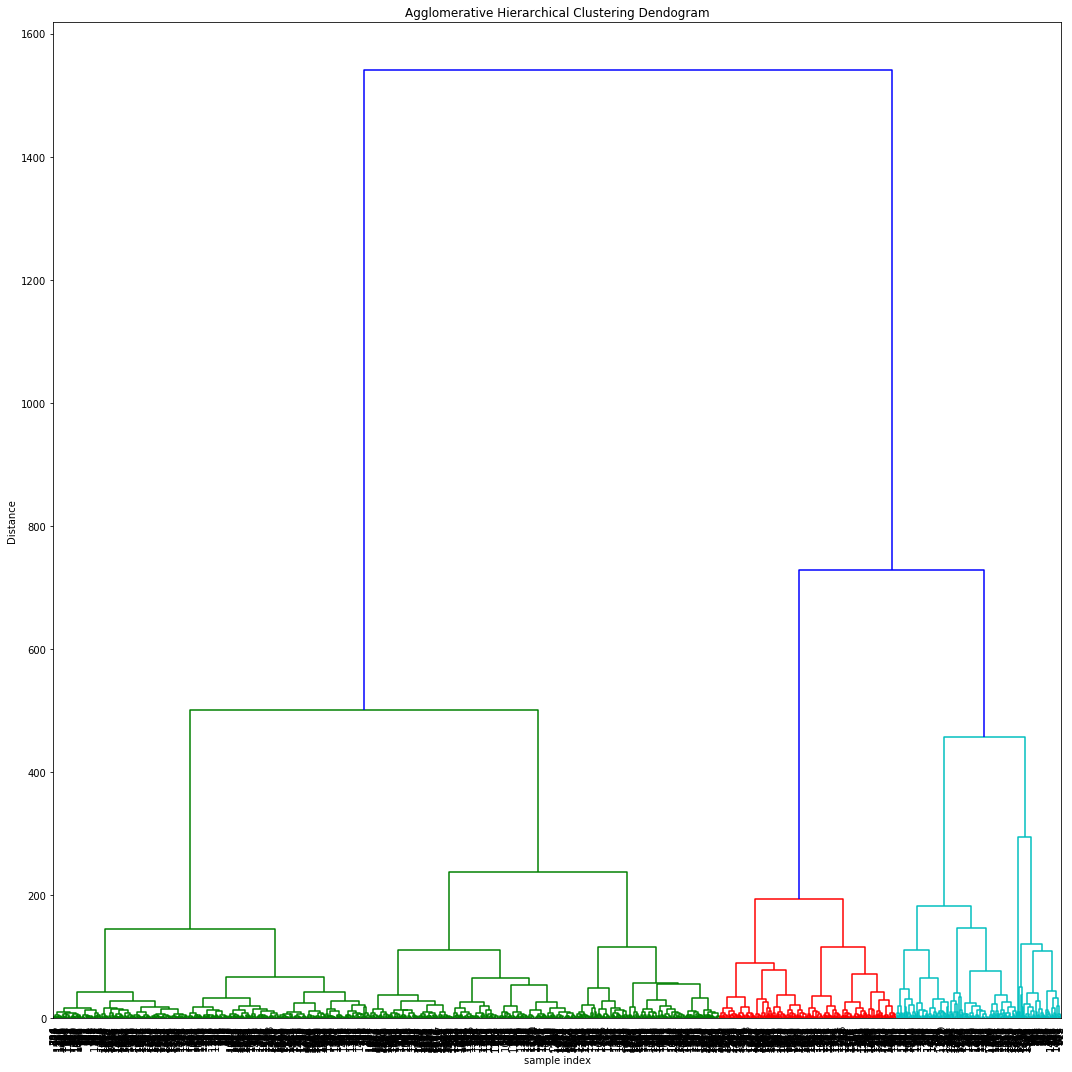

In [55]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

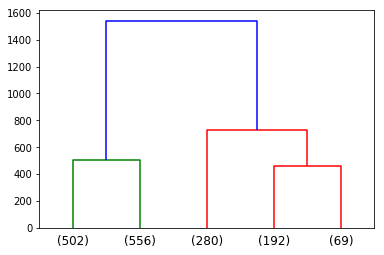

In [56]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
)
plt.show()